#  Introducción a ecuaciones diferenciales


<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/3/39/GodfreyKneller-IsaacNewton-1689.jpg" width="300px" height="100px" />

> Las primeras ecuaciones diferenciales se encuentran históricamente con la invención del cálculo por Newton y Leibniz. En el Capítulo 2 de su trabajo "Methodus fluxionum et Serierum Infinitarum", (Newton, 1671), Newton describe ecuaciones del tipo 

$$\frac{dy(x)}{dx}=f(x,y(x)).$$

**Referencia**
- https://en.wikipedia.org/wiki/Differential_equation
- https://www.mathsisfun.com/calculus/differential-equations.html

## 0. Nociones básicas

### Definición
Una ecuación diferencial es una ecuación que involucra una función y una o más de sus derivadas.

Por ejemplo

<img style="float: left; margin: 0px 0px 15px 15px;" src="https://www.mathsisfun.com/calculus/images/diff-eq-1.svg" width="300px" height="100px" />

una ecuación de la función $y(x)$ y su derivada $\frac{dy(x)}{dx}$.

Pero bueno, cuando tenemos una **ecuación**, ¿qué hacemos con ella?

### Solución

Decimos que hemos resuelto la ecuación diferencial si descubrimos la función $y(x)$ (o conjunto de funciones $y(x)$).

**Ejemplo** Estudiar la ecuación diferencial:

$$\frac{\text{d}x}{\text{d}t}=a x(t), \quad a \in \mathbb{R}.$$

___
Cuando una ecuación puede ser resuelta, hay varios trucos para intentar resolverla. En muchos casos, no es posible o es muy difícil encontrar la solución analítica. Por eso, en el curso examinaremos la forma de encontrar solución numérica.

## 1. ¿Porqué son útiles las ecuaciones diferenciales?

Antes qué nada, conceptualmente, **¿qué significa la derivada $\frac{dx}{dt}$?**

Nuestro mundo, y particularmente los fenómenos que estudiamos en ingeniería, es cambiante (evoluciona) en el tiempo. De modo que las descripciones (modelos) de como cambian las cosas en el tiempo terminan como una ecuación diferencial.

### Ejemplos.

**1. Biología (crecimiento poblacional de conejos)**

Mientras más conejos tengamos, más bebés conejo obtendremos (los conejos tienen una grandiosa habilidad de reproducción). Luego, los bebés conejo crecen y tienen bebés a la vez. La población crece muy muy rápido.

Partes importantes:

- Población en el tiempo $t$: $N(t)$.
- Tasa de crecimiento: $r$.
- Tasa de cambio de la población: $\frac{dN}{dt}$.

Imaginemos algunos valores:

- La población actual (en el tiempo $t=0$) es $N(0)=1000$ conejos.
- La tasa de crecimiento es de $0.01$ conejos por semana por cada conejo actualmente.

Entonces la tasa de cambio de la población $\left.\frac{dN}{dt}\right|_{t=0}=0.01\times 1000$.

Sin embargo, esto sólo es cierto en el tiempo específico $t=0$, y esto no significa que la población crece de manera constante.

Recordemos que: mientras más conejos, más conejos nuevos se obtienen.

De manera que es mejor decir que la tasa de cambio (en cualquier instante de tiempo $t$) es la tasa de crecimiento $r$ veces la población $N(t)$ en ese instante:

$$\frac{dN}{dt}=rN,$$

y eso es una ecuación diferencial, porque es una ecuación de la función $N(t)$ y su derivada.

**El poder de las matemáticas... con esa simple expresión decimos que "la tasa de cambio de la población en el tiempo equivale a la tasa de crecimiento veces la población".**

### <font color=green>Las ecuaciones diferenciales pueden describir como cambia la población, como se dispersa el calor, como un material radioactivo se desintegra y mucho más. Son una forma natural de describir cambios o movimiento en el universo..</font>


### ¿Qué hacemos con la ecuación diferencial?

En principio, las ecuaciones diferenciales son magníficas para expresar (modelar) muchos fenómenos. Sin embargo, son difíciles de usar tal cual están.

De manera que intentamos **resolverlas** encontrando la(s) función(es) que satisfagan la ecuación, es decir, quitando la derivada, de manera que podamos hacer cálculos, gráficas, predecir, y todo lo demás.

**2. Finanzas (interés continuamente compuesto)**

El valor del dinero cambia en el tiempo. Esto se expresa por medio de tasas de interés. Normalmente, el interés se puede calcular en tiempo fijados como años, meses, etcétera, y esto se añade al capital inicial y se reinvierte.

Esto se llama interés compuesto.

Pero cuando se compone continuamente (en todo tiempo), entonces a cada instante, el interés se añade proporcionalmente a la inversión (o préstamo).

Mientras más inversión (o préstamo) más interés gana.

Usando $t$ para el tiempo, $r$ para la tasa de interés y $V(t)$ para el valor en el instante $t$ de la inversión, podemos expresar la siguiente ecuación:

$$\frac{dV}{dt}=rV.$$

Notar que es la misma ecuación que tenemos para los conejos, solo con diferentes letras. Entonces, las matemáticas muestran que esos dos fenómenos se comportan de la misma manera.

Ya dijimos que como ecuación, es difícil usar esta información. Pero como ya vimos, se puede resolver (por separación de variables) y la solución es:

$$V(t) = P e^{rt},$$

donde $P$ es el principal (capital inicial).

De forma que un préstamo continuamente compuesto de $1,000 por dos años y una tasa de interés del 10% se vuelve:

$$V = 1000 × e^{2\times0.1}$$
$$V = 1000 × 1.22140...$$
$$V = $1,221.40$$

**3. Mecánica Clásica**

Un resorte tiene una masa amarrada:

- la masa es jalada hacia la derecha,
- cuando el resorte se estira, su tensión se incrementa,
- la masa se detienne,
- la tensión del resorte la jala de nuevo hacia arriba,
- luego baja, luego sube, luego baja, etcétera...

Descripción (en el tablero)...

**Ejercicio:** Simular el sistema masa-resorte obtenido con un valor de $m=0.5\, kg$, una constante de Hook $k = 0.8$ y condiciones iniciales $x(0)=0.2\,m$, $v(0)=0\,m/s$ y en un intervalo de tiempo de $t=[0,30]\, s$

In [1]:
# importar librerías
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as ode

In [2]:
#Librería para integrar numéricamente solve_ivp
ode.solve_ivp?

In [3]:
#Definir ecuación diferencial
def masa_resorte(t,y):
    x = y[0]
    v = y[1]
    
    #Parámetros
    m = 0.5
    k = 0.8
    
    #Defino el sistema de ecuaciones diferenciales
    dx = v
    dv = -(k/m)*x
    
    return [dx,dv]

In [10]:
#Condición inicial
y0 = [0.2,0]

#intervalo de tiempo
t1 = (0,30)

#solución
sol1 = ode.solve_ivp(masa_resorte,t1,y0, max_step=.01)
sol1

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 18008
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 3.10945274e-03, 1.31094527e-02, ...,
       2.99831095e+01, 2.99931095e+01, 3.00000000e+01])
 t_events: None
        y: array([[ 0.2       ,  0.19999845,  0.1999725 , ...,  0.19487571,
         0.19429114,  0.19387025],
       [ 0.        , -0.00099502, -0.00419483, ..., -0.05689931,
        -0.06001268, -0.06215241]])
 y_events: None

In [12]:
#Obtener vector t (tiempo) y solución (y)
t = sol1.t
y = sol1.y.T

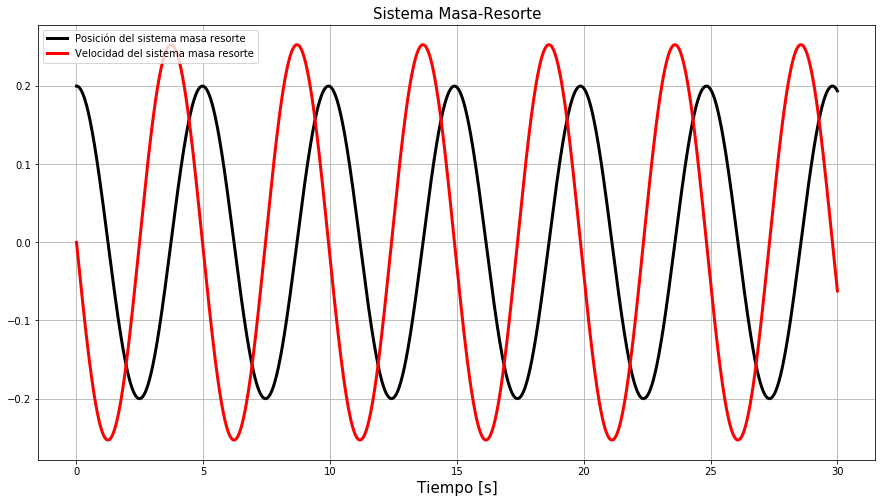

In [13]:
#Graficas
plt.figure(figsize=(15,8))

plt.title('Sistema Masa-Resorte', fontsize=15)

plt.plot(t, y[:,0], 'k', lw =3, label='Posición del sistema masa resorte')
plt.plot(t, y[:,1], 'r', lw=3, label='Velocidad del sistema masa resorte')

plt.xlabel('Tiempo [s]',fontsize=15)

plt.grid()
plt.legend(loc='best')
plt.show()

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Cristian Camilo Zapata Zuluaga
</footer>